# K-Means Clustering

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:, [ 3, 4]].values

## Using the elbow method to find the optimal number of clusters

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156595, 21862.09267218289, 19672.07284901432]


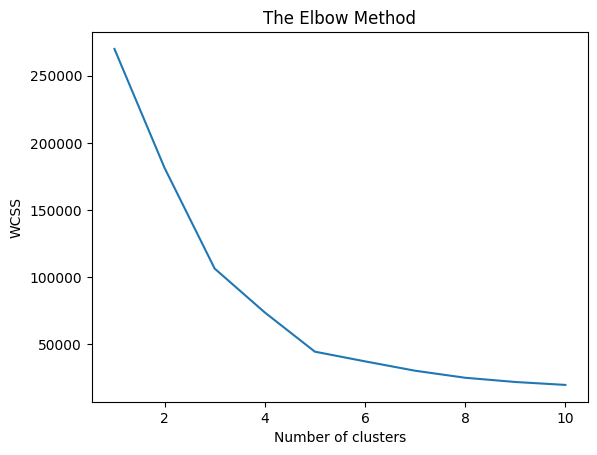

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [6]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

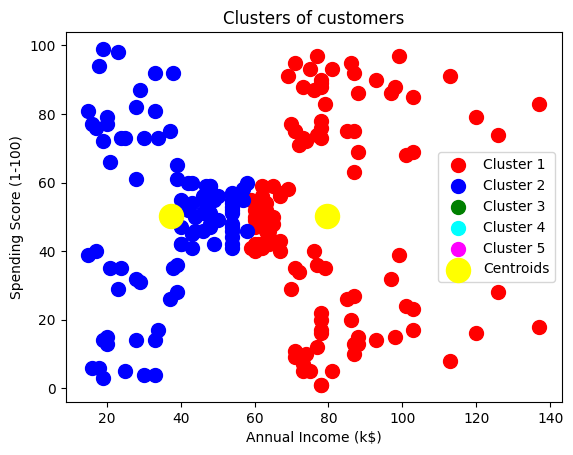

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [8]:
print(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1])

[ 59  59  60  60  60  60  60  60  61  61  62  62  62  62  62  62  63  63
  63  63  63  63  64  64  65  65  65  65  67  67  67  67  69  69  70  70
  71  71  71  71  71  71  72  72  73  73  73  73  74  74  75  75  76  76
  77  77  77  77  78  78  78  78  78  78  78  78  78  78  78  78  79  79
  81  81  85  85  86  86  87  87  87  87  87  87  88  88  88  88  93  93
  97  97  98  98  99  99 101 101 103 103 103 103 113 113 120 120 126 126
 137 137] [55 41 49 40 42 52 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46
 48 50 43 59 43 57 56 40 58 91 29 77 35 95 11 75  9 75 34 71  5 88  7 73
 10 72  5 93 40 87 12 97 36 74 22 90 17 88 20 76 16 89  1 78  1 73 35 83
  5 93 26 75 20 95 27 63 13 75 10 92 13 86 15 69 14 90 32 86 15 88 39 97
 24 68 17 85 23 69  8 91 16 79 28 74 18 83]


In [9]:
print(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1])

[] []


In [10]:
kmeans.predict([[15, 81]])

array([1])

In [11]:
true_dataset = pd.read_csv('Mall_Customers_cls_1.csv')

In [12]:
true_dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5,Unnamed: 6
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,2
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,0,1


In [13]:
clusters = true_dataset.iloc[:,6].values
print(clusters)

[1 1 2 1 1 1 2 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 2 1 2
 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 2 1 1 1 1 2 1 1 2 2 1 2 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 1 2 2 2 1 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [14]:
from sklearn import metrics
metrics.rand_score(clusters, y_kmeans)

0.6132663316582915